In [1]:
# 这种也是预测的，其实都一样，根据各种特征来预测
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [2]:
train_data = pd.read_csv('datalab/1386/titanic_train.csv')
test_data = pd.read_csv('datalab/1386/titanic_test.csv')

In [3]:
train_data.info()
print("-" * 40)
# 这个就是四十个分割的构成个分割线而已
test_data.info()
# 没有满的就说明有缺失值，然后要想办法补充

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

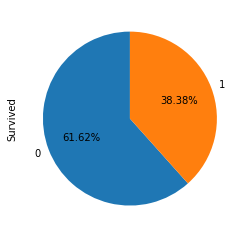

In [4]:
train_data['Survived'].value_counts().plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                                               shadow = False,startangle = 90,pctdistance = 0.6)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

In [5]:
# 这里进行缺失值处理
#     如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行；
#     如果该属性相对学习来说不是很重要，可以对缺失值赋均值或者众数。
#     对于标称属性，可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。
#     比如船舱号Cabin这一属性，缺失可能代表并没有船舱。
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values
#replace missing value with U0
train_data['Cabin'] = train_data.Cabin.fillna('U0')    
#train_data.Cabin[train_data.CAbin.isnull()]='U0'


In [7]:
# 使用回归 随机森林等模型来预测缺失属性的值。
# 因为Age在该数据集里是一个相当重要的特征（先对Age进行分析即可得知），
# 所以保证一定的缺失值填充准确率是非常重要的，对结果也会产生较大影响
# 这里使用随机森林预测模型，选取数据集中的数值属性作为特征
# （因为sklearn的模型只能处理数值属性，所以这里先仅选取数值特征，
# 但在实际的应用中需要将非数值特征转换为数值特征）
from sklearn.ensemble import RandomForestRegressor

#choose training data to predict age
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
# 这个就是切片，每一行的第二列到最后一列，也就是一个人的各种特征
Y = age_df_notnull.values[:,0]
# 每一行的第一列，也就是每一个人的id
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# 接下来分析各个特征与生存的关系
print(train_data.groupby(['Sex','Survived'])['Survived'].count())


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [11]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


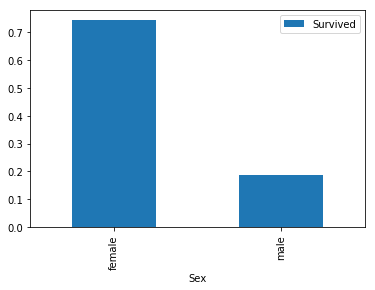

In [12]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

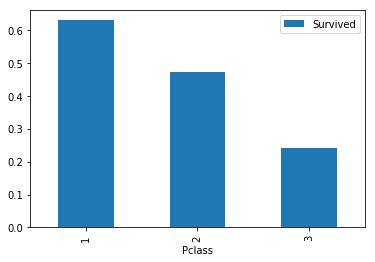

In [13]:
# 这个是船舱等级
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

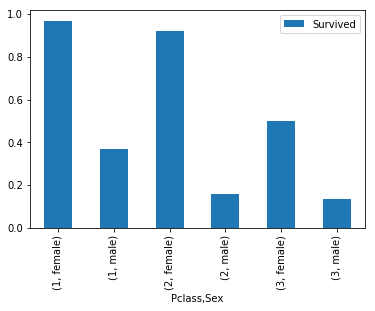

In [14]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [15]:
print(train_data.groupby(['Sex','Pclass','Survived'])['Survived'].count())

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64


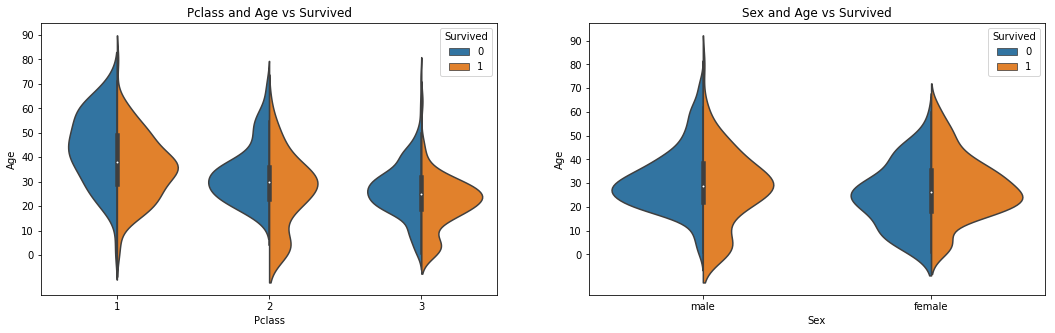

In [16]:
fig,ax = plt.subplots(1,2, figsize = (18,5))
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Pclass","Age",hue="Survived",data=train_data,split=True,ax=ax[0])
# 不同等级船舱年龄分布和生存的关系
ax[0].set_title('Pclass and Age vs Survived') 

ax[1].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
 
plt.show()

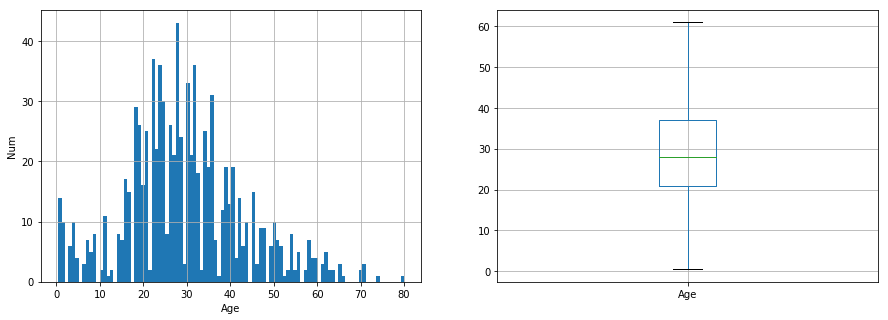

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
train_data['Age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Num')
 
plt.subplot(122)
train_data.boxplot(column='Age',showfliers=False)
plt.show()

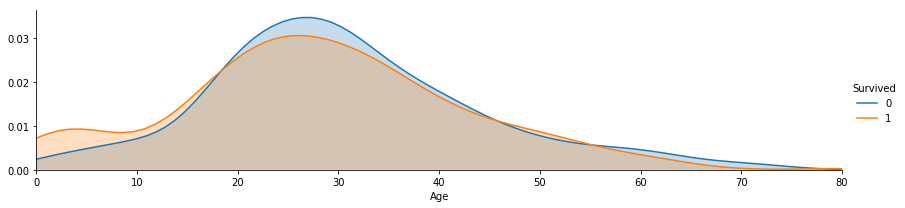

In [18]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()

In [19]:
# 其他的特征类似来处理看看就差不多了


In [20]:
# 接下来进行变量转换，把数据转换成适合模型使用的数据
# 定性就是某一方式，定量就是某一不能被数学表示的方面
# 现在定性转换，
# 当qualitative variable是一些频繁出现的几个独立变量时，
# Dummy Variables比较适用
# 这个上船的地点就这三个值
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1, inplace=True)
embark_dummies = train_data[['S','C','Q']]

In [21]:
# cabin船舱号这种不好处理，变量比较多，所以用factorize()，
# 它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，
# 这种映射最后只生成一个特征，不像dummy那样生成多个特征
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

In [22]:
# 定性转换
# Scaling可以将一个很大范围的数值映射到一个很小范围（通常是 -1到1，或者是0到1），
# 很多情况下我们需要将数值做Scaling使其范围大小一样，
# 否则大范围数特征将会有更高的权重
# 比如：Age的范围可能只是0-100，而income的范围可能是0-10000000
from sklearn import preprocessing
 
assert np.size(train_data['Age']) == 891
# StandardScaler will subtract the mean from each value then scale to the unit varience
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))

In [23]:
# Binning通过观察“邻居”（即周围的值）
# 将连续数据离散化。
# 存储的值被分布到一些“桶”或“箱”中，
# 就像直方图的bin将数据划分成几块一样。
# 在这对fare进行操作，fare是票价
# 这个sibsp是同乘的兄弟配偶，parch是同乘的父母小孩
# Divide all fares into quartiles
train_data['Fare_bin'] = pd.qcut(train_data['Fare'],5)
print(train_data['Fare_bin'].head())

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]


In [24]:
# 在将数据Binning化后，要么将数据factorize化，要么dummies化
# 这就是定量之后变成定性来转换
# qcut() create a new variable that idetifies the quartile range, but we can't use the string
# so either factorize or create dummies from the result
 
# factorize
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]
 
# dummies
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [25]:
# 在进行特征工程的时候，我们不仅需要对训练数据进行处理，
# 还需要同时将测试数据同训练数据一起处理，
# 使得二者具有相同的数据类型和数据分布
# 其实就是提取有较大或者较小影响的特征，作为训练模型的依据
# 一般都是从有缺失值的开始
train_df_org = pd.read_csv('./datalab/1386/titanic_train.csv')
test_df_org = pd.read_csv('./datalab/1386/titanic_test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)   #891+418=1309rows, 12columns
PassengerId = test_df_org['PassengerId']

In [26]:
# 这个embark缺的不多，直接众数了
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)

In [27]:
#为了后面的特征分析，这里我们将Embarked特征进行factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
 
#使用pd.get_dummies获取one-hot编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)


In [28]:
# 为了后面的特征分析，这里我们也将Sex特征进行factorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
 
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)

In [29]:
# 从名字中提取各种称呼
# what is each person's title?
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
combined_train_test['Title'] = combined_train_test['Title'].apply(lambda x:x.strip())

In [30]:
# 各种称呼统一处理
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
 
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

In [31]:
# 不同称呼进行分类
#为了后面的特征分析，这里我们也将Title特征进行factorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'],prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test,title_dummies_df],axis=1)

In [32]:
# 这名字长度特征我也不知道提取了有什么用
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

In [33]:
# 这fare也缺了一个值，直接拿对应座舱等级的均价来填充了
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [34]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare']/combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'],axis=1,inplace=True)
# 将团体票价分到每个人头上，因为能看出来部分票号是重复的

In [35]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)

In [36]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)
 
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]
 
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df],axis=1)
combined_train_test.drop(['Fare_bin'],axis=1, inplace=True)

In [37]:
# 这不同等级的船舱可能位置和逃生的顺序有关
print(combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean())

Pclass
1    33.910500
2    11.411010
3     7.337571
Name: Fare, dtype: float64


In [38]:
from sklearn.preprocessing import LabelEncoder
 
#建立Pclass Fare Category
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare,pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'
 
Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(1)
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(2)
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(3)
 
#建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category,args=(
        Pclass1_mean_fare,Pclass2_mean_fare,Pclass3_mean_fare),axis=1)
pclass_level = LabelEncoder()
 
#给每一项添加标签
pclass_level.fit(np.array(['Pclass1_Low','Pclass1_High','Pclass2_Low','Pclass2_High','Pclass3_Low','Pclass3_High']))
 
#转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])
 
# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test,pclass_dummies_df],axis=1)


In [39]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

In [40]:
# 这没有亲友或者太多都会影响到生存率，所以合并起来
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                        prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [41]:
# 综合其他的性别，座舱等级来预测年龄
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,2,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,4,0
26,NaN,1,0,0,23,1,1,7.2250,4,0
28,NaN,2,1,2,29,1,1,7.8792,0,0


In [42]:
# 多模型预测再融合
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])

    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

In [43]:
# 利用结果填充缺失值
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   15.0s remaining:   15.0s


[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   16.5s finished
C:\python_code\metro_ai\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-128.91017292844361
GB Train Error for "Age" Feature Regressor:-65.79115093595303


5     37.295638
17    31.473608
19    34.148896
26    28.779473
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s


[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    4.2s finished
C:\python_code\metro_ai\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-119.67941389991391
RF Train Error for "Age" Feature Regressor-96.82296812792812
5     33.513123
17    33.098071
19    34.853983
26    28.148613
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)


5     29.981482
17    29.981482
19    29.981482
26    29.981482
Name: Age, dtype: float64


In [44]:
# 这票的值也有影响，有的字母不同，所以现在分开看看
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)

# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0, inplace=True)

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

In [45]:
# cabin缺失太多，在这暂时保留，分为有和无两类
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

In [46]:
# 接下来进行特征相关性分析
Correlation = pd.DataFrame(combined_train_test[['Embarked','Sex','Title','Name_length','Family_Size',
                                                'Family_Size_Category','Fare','Fare_bin_id','Pclass',
                                                'Pclass_Fare_Category','Age','Ticket_Letter','Cabin']])

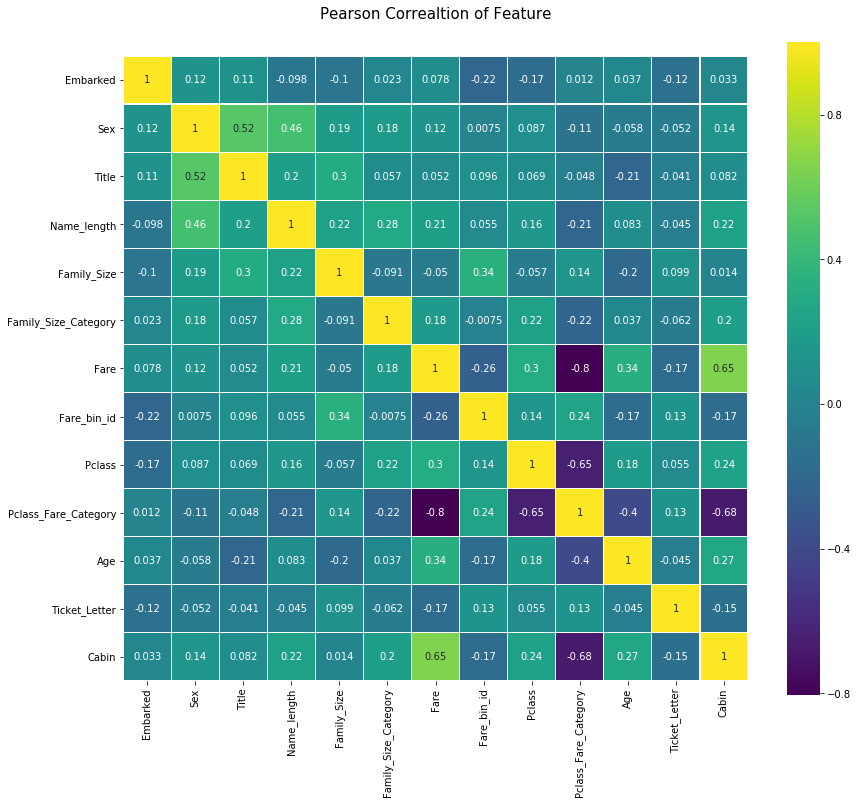

In [47]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correaltion of Feature',y=1.05,size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

LinAlgError: singular matrix

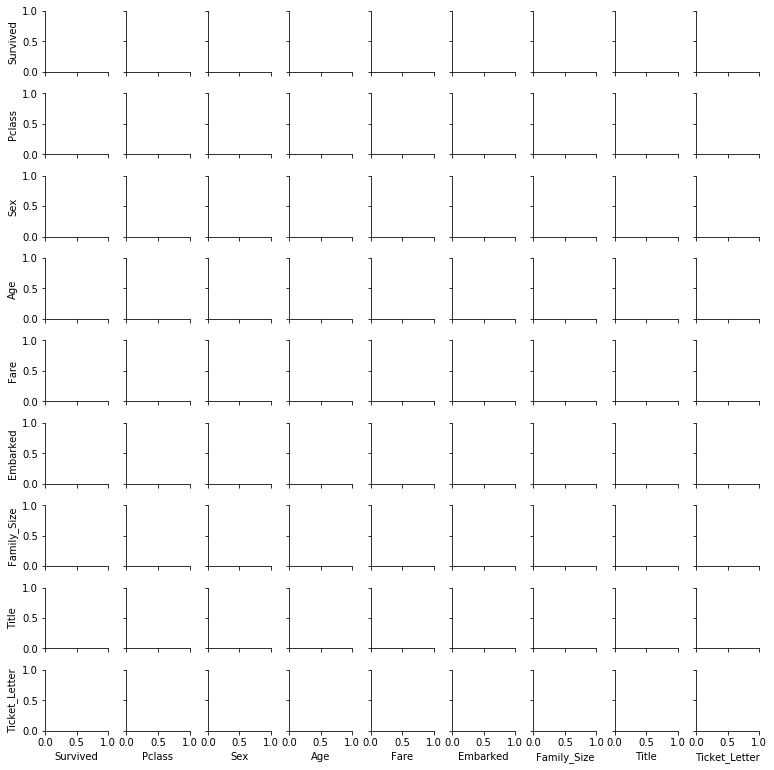

In [48]:
g = sns.pairplot(combined_train_test[[u'Survived',u'Pclass',u'Sex',u'Age',u'Fare',u'Embarked',
                                      u'Family_Size',u'Title',u'Ticket_Letter']],hue='Survived',
                                      palette = 'seismic',size=1.2,diag_kind ='kde',diag_kws=
                                      dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

In [49]:
# 在输入模型前，对age和fare进行正则化
from sklearn import preprocessing
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare','Name_length']])
combined_train_test[['Age','Fare','Name_length']] = scale_age_fare.transform(combined_train_test[['Age','Fare','Name_length']])

In [50]:
# 丢弃不要的
combined_data_backup = combined_train_test

combined_train_test.drop(['PassengerId','Embarked','Sex','Name','Fare_bin_id','Pclass_Fare_Category',                          'Parch','SibSp','Family_Size_Category','Ticket'],axis=1,inplace=True)


In [51]:
# 训练集和测试集分开
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
 
titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [52]:
titanic_train_data_X.shape

(891, 34)

In [53]:
titanic_train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 34 columns):
Age                       891 non-null float64
Cabin                     891 non-null int64
Fare                      891 non-null float64
Pclass                    891 non-null int64
Embarked_0                891 non-null uint8
Embarked_1                891 non-null uint8
Embarked_2                891 non-null uint8
Sex_0                     891 non-null uint8
Sex_1                     891 non-null uint8
Title                     891 non-null int64
Title_-1                  891 non-null uint8
Title_0                   891 non-null uint8
Title_1                   891 non-null uint8
Title_2                   891 non-null uint8
Title_3                   891 non-null uint8
Title_4                   891 non-null uint8
Title_5                   891 non-null uint8
Name_length               891 non-null float64
Fare_0                    891 non-null uint8
Fare_1                    891 non-

In [54]:
# 模型融合
#  利用不同的模型来对特征进行筛选，选出较为重要的特征
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    
    #randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=25,cv=10,verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Feeatures from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=25,cv=10,verbose=1)
    et_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=25,cv=10,verbose=1)
    gb_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
    dt_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(titanic_train_data_X),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_et,features_top_n_gb,features_top_n_dt],
                              ignore_index=True).drop_duplicates()
    features_importance = pd.concat([feature_imp_sorted_rf,feature_imp_sorted_ada,feature_imp_sorted_et,
                                     feature_imp_sorted_gb,feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n,features_importance


In [55]:
# 利用不同模型对特征进行筛选
feature_to_pick = 30
feature_top_n,feature_importance = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   20.6s remaining:   11.0s


[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   21.3s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8260381593714927
Top N Features RF Train Score:0.978675645342312
Sample 10 Feeatures from RF Classifier
17      Name_length
0               Age
2              Fare
11          Title_0
8             Sex_1
9             Title
7             Sex_0
29      Family_Size
3            Pclass
33    Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    4.3s remaining:    2.3s


[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    7.2s finished


Top N Features Best Ada Params:{'learning_rate': 0.01, 'n_estimators': 500}
Top N Features Best Ada Score:0.8159371492704826
Top N Features Ada Train Score:0.8204264870931538
Sample 10 Features from Ada Classifier:
11                   Title_0
2                       Fare
30    Family_Size_Category_0
7                      Sex_0
29               Family_Size
3                     Pclass
1                      Cabin
8                      Sex_1
17               Name_length
0                        Age
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    4.3s remaining:    2.3s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    4.5s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best DT Score:0.8305274971941639
Top N Features ET Train Score:0.9696969696969697
Sample 10 Features from ET Classifier:
11          Title_0
7             Sex_0
8             Sex_1
17      Name_length
0               Age
2              Fare
9             Title
1             Cabin
33    Ticket_Letter
3            Pclass
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   23.6s remaining:   12.7s


[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   24.4s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7822671156004489
Top N Features GB Train Score:0.9966329966329966
Sample 10 Feature from GB Classifier:
11                   Title_0
0                        Age
2                       Fare
17               Name_length
29               Family_Size
9                      Title
28                  Pclass_5
30    Family_Size_Category_0
3                     Pclass
33             Ticket_Letter
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s


Top N Features Bset DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7822671156004489
Top N Features DT Train Score:0.9607182940516273
Sample 10 Features from DT Classifier:
11                   Title_0
2                       Fare
0                        Age
17               Name_length
30    Family_Size_Category_0
16                   Title_5
3                     Pclass
28                  Pclass_5
33             Ticket_Letter
29               Family_Size
Name: feature, dtype: object


[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.1s finished


In [56]:
# 可视化看看
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')

plt.show()

In [57]:
# 常见的模型融合方法有：Bagging、Boosting、Stacking、Blending。
# 6.3.1 Bagging
# 
# Bagging将多个模型，也就是基学习器的预测结果进行简单的加权平均或者投票。它的好处是可以并行地训练基学习器。Random Forest就用到了Bagging的思想。
# 6.3.2 Boosting
# 
# Boosting的思想有点像知错能改，每个基学习器是在上一个基学习器学习的基础上，对上一个基学习器的错误进行弥补。我们将会用到的AdaBoost，Gradient Boost就用到了这种思想。
# 6.3.3. Stacking
# 
# Stacking是用新的次学习器去学习如何组合上一层的基学习器。如果把Bagging看作是多个基分类器的线性组合，那么Stacking就是多个基分类器的非线性组合。Stacking可以将学习器一层一层地堆砌起来，形成一个网状的结构。 相比来说Stacking的融合框架相对前面二者来说在精度上确实有一定的提升，所以在下面的模型融合上，我们也使用Stacking方法。
# 6.3.4 Blending
# 
# Blending和Stacking很相似，但同时它可以防止信息泄露的问题。
# 
# Stacking框架融合：这里我们使用了两层的模型融合
# 
# Level 1使用了：Random Forest、AdaBoost、ExtraTrees、GBDT、Decision Tree、KNN、SVM，一共7个模型
# 
# Level 2使用了XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。
# 
# Level 1：
# 
# Stacking框架是堆叠使用基础分类器的预测作为对二级模型的训练的输入。然而，我们不能简单地在全部训练数据上训练基本模型，产生预测，输出用于第二层的训练。如果我们在Train Data上训练，然后在Train Data上预测，就会造成标签。为了避免标签，我们需要对每个基学习器使用K-fold，将Kge模型对Valid Set的预测结果拼起来，作为下一层学习器的输入。
# 
# 所以这里我们建立输出fold预测方法：


In [58]:
from sklearn.model_selection import KFold
 
# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,random_state=SEED,shuffle=False)
 
def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr,y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
et = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,max_depth=8,min_samples_leaf=2,verbose=0)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
 
knn = KNeighborsClassifier(n_neighbors=2)
 
svm = SVC(kernel='linear',C=0.025)


In [60]:
# pandas转arrays
# Create Numpy arrays of train,test and target(Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values   #Creates an array of the train data
x_test = titanic_test_data_X.values   #Creates an array of the test data
y_train = titanic_train_data_Y.values


In [61]:
# Create our OOF train and test predictions.These base result will be used as new featurs
rf_oof_train,rf_oof_test = get_out_fold(rf,x_train,y_train,x_test)  # Random Forest
ada_oof_train,ada_oof_test = get_out_fold(ada,x_train,y_train,x_test)  # AdaBoost
et_oof_train,et_oof_test = get_out_fold(et,x_train,y_train,x_test)  # Extra Trees
gb_oof_train,gb_oof_test = get_out_fold(gb,x_train,y_train,x_test)  # Gradient Boost
dt_oof_train,dt_oof_test = get_out_fold(dt,x_train,y_train,x_test)  #Decision Tree
knn_oof_train,knn_oof_test = get_out_fold(knn,x_train,y_train,x_test)  # KNeighbors
svm_oof_train,svm_oof_test = get_out_fold(svm,x_train,y_train,x_test)  # Support Vector
 
print("Training is complete")


Training is complete


In [62]:
# Level 2：我们利用XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测
x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
x_test =np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)


In [64]:
from xgboost import XGBClassifier
 
gbm = XGBClassifier(n_estimators=200,max_depth=4,min_child_weight=2,gamma=0.9,subsample=0.8,
                    colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=1).fit(x_train,y_train)
predictions = gbm.predict(x_test)

In [65]:
StackingSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')

In [67]:
# 对数据不断地进行特征工程，产生的特征越来越多，用大量的特征对模型进行训练，
# 会使我们的训练集拟合得越来越好，但同时也可能会逐渐丧失泛化能力，
# 从而在测试数据上表现不佳，发生过拟合现象
# 构建学习曲线函数
from sklearn.model_selection import learning_curve
#  要在这model_selection里面选才能找到
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                        n_jobs=1,train_sizes=np.linspace(.1,1.0,5),verbose=0):
    """
    Generate a simple plot of the test and training learning curve.
    
    Parameters
    -------------
    estimator:object type that implents the "fit" and "predict" methods
    An object of that type which is cloned for each validation.
    
    title:string
    Title for the chart.
    
    X:array-like,shape(n_samples,n_features)
    Training vector,where n_samples is the number of samples and n_features is 
    the number of features.
    
    y:array-like,shape(n_samples) or (n_samples,n_features),optional
    Target relative to X for classification or regression;
    None for unsupervised learning.
    
    ylim:tuple,shape(ymin,ymax),optional
    Defines minimum and maximum yvalues plotted.
    
    cv:integer,cross-validation generator,optional
    If an integer is passed,it is the number of folds(defaults to 3).
    Specific cross-validation objects can be passed,see
    sklearn.cross_validation module for the list of possible objects
    
    n_jobs:integer,optional
    Number of jobs to run in parallel(default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,
                                                          n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

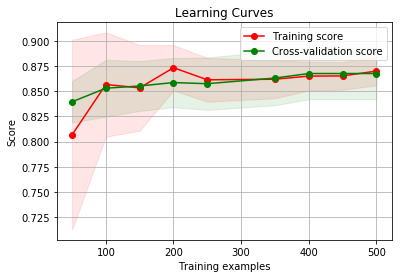

In [68]:
X = x_train
Y = y_train
 
# RandomForest
rf_parameters = {'n_jobs':-1,'n_estimators':500,'warm_start':True,'max_depth':6,
                 'min_samples_leaf':2,'max_features':'sqrt','verbose':0}
 
# AdaBoost
ada_parameters = {'n_estimators':500,'learning_rate':0.1}
 
# ExtraTrees
et_parameters = {'n_jobs':-1,'n_estimators':500,'max_depth':8,'min_samples_leaf':2,'verbose':0}
 
# GradientBoosting
gb_parameters = {'n_estimators':500,'max_depth':5,'min_samples_leaf':2,'verbose':0}
 
# DecisionTree
dt_parameters = {'max_depth':8}
 
# KNeighbors
knn_parameters = {'n_neighbors':2}
 
# SVM
svm_parameters = {'kernel':'linear','C':0.025}
 
# XGB
gbm_parameters = {'n_estimators':2000,'max_depth':4,'min_child_weight':2,'gamma':0.9,'subsample':0.8,
                  'colsample_bytree':0.8,'objective':'binary:logistic','nthread':-1,'scale_pos_weight':1}
 
 
title = "Learning Curves"
plot_learning_curve(RandomForestClassifier(**rf_parameters),title,X,Y,cv=None,n_jobs=4,
                    train_sizes=[50,100,150,200,250,350,400,450,500])
plt.show()


In [69]:
# 调超参自己慢慢调把